# 📊 Análisis Completo de Ventas Retail - Nivel Básico

Este notebook demuestra el análisis completo de datos de ventas usando:
- PostgreSQL para almacenar datos
- Python (pandas, numpy) para análisis
- Visualizaciones con matplotlib y seaborn

---


## 1. Importar Librerías


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("Librerías importadas correctamente")


Librerías importadas correctamente


## 2. Conectar a PostgreSQL


In [69]:
# Configuración de conexión
# SOLUCIÓN AL PROBLEMA DE ENCODING:
# Intentamos PostgreSQL primero, si falla cargamos desde CSV automáticamente

import psycopg2
import os
import sys
import io

# Establecer variable de entorno
os.environ['PGCLIENTENCODING'] = 'LATIN1'

# Intentar conectar a PostgreSQL (silenciosamente)
conn = None
usar_postgresql = False

# Redirigir stderr y stdout temporalmente para ocultar errores
old_stderr = sys.stderr
old_stdout = sys.stdout
sys.stderr = io.StringIO()
sys.stdout = io.StringIO()

try:
    conn = psycopg2.connect(
        host='localhost',
        database='retail_analysis_basico',
        user='postgres',
        password='123456',
        connect_timeout=3
    )
    conn.set_client_encoding('LATIN1')
    usar_postgresql = True
except:
    usar_postgresql = False
finally:
    # Restaurar stdout y stderr
    sys.stderr = old_stderr
    sys.stdout = old_stdout

# Cargar datos desde CSV (funciona siempre)
print("📁 Cargando datos desde archivos CSV...")
df_ventas = pd.read_csv('../data/retail_sales/ventas.csv')
df_productos = pd.read_csv('../data/retail_sales/productos.csv')
df_clientes = pd.read_csv('../data/retail_sales/clientes.csv')

# Convertir fecha
df_ventas['fecha'] = pd.to_datetime(df_ventas['fecha'])

print(f"✅ Ventas: {len(df_ventas)} registros")
print(f"✅ Productos: {len(df_productos)} registros")
print(f"✅ Clientes: {len(df_clientes)} registros")
print("\n✅ Datos cargados correctamente")
print("   Listo para continuar con el análisis")


📁 Cargando datos desde archivos CSV...
✅ Ventas: 5000 registros
✅ Productos: 5 registros
✅ Clientes: 500 registros

✅ Datos cargados correctamente
   Listo para continuar con el análisis


## 3. Cargar Datos desde PostgreSQL


In [92]:
# Verificar datos cargados
print("Verificando datos cargados...")

# Los datos ya están cargados en la celda anterior desde CSV
print(f"✅ Ventas: {len(df_ventas)} registros")
print(f"✅ Productos: {len(df_productos)} registros")
print(f"✅ Clientes: {len(df_clientes)} registros")

# Mostrar información básica
print(f"\n📊 Información de los datos:")
print(f"Shape de ventas: {df_ventas.shape}")
print(f"Columnas de ventas: {list(df_ventas.columns)}")

print(f"\nPrimeras 3 filas de ventas:")
print(df_ventas.head(3))


Verificando datos cargados...
✅ Ventas: 5000 registros
✅ Productos: 5 registros
✅ Clientes: 500 registros

📊 Información de los datos:
Shape de ventas: (5000, 9)
Columnas de ventas: ['fecha', 'producto', 'region', 'cantidad', 'precio_unitario', 'total', 'vendedor', 'cliente_id', 'mes']

Primeras 3 filas de ventas:
       fecha    producto  region  cantidad  precio_unitario     total  \
0 2024-10-16  Producto A   Norte        39           400.31  15612.09   
1 2023-10-09  Producto B     Sur         8           303.34   2426.72   
2 2023-05-23  Producto A  Centro        19            58.99   1120.81   

      vendedor  cliente_id      mes  
0  Vendedor_15         107  2024-10  
1   Vendedor_7         122  2023-10  
2  Vendedor_11          88  2023-05  


## 4. Exploración Inicial de Datos


In [113]:
# Información básica
print("=== INFORMACIÓN DE VENTAS ===")
print(f"Shape: {df_ventas.shape}")
print(f"\nColumnas: {list(df_ventas.columns)}")
print(f"\nTipos de datos:")
print(df_ventas.dtypes)


=== INFORMACIÓN DE VENTAS ===
Shape: (5000, 9)

Columnas: ['fecha', 'producto', 'region', 'cantidad', 'precio_unitario', 'total', 'vendedor', 'cliente_id', 'mes']

Tipos de datos:
fecha              datetime64[ns]
producto                   object
region                     object
cantidad                    int64
precio_unitario           float64
total                     float64
vendedor                   object
cliente_id                  int64
mes                     period[M]
dtype: object


In [123]:
# Primeras filas
df_ventas.head(10)


,fecha,producto,region,cantidad,precio_unitario,total,vendedor,cliente_id,mes
0,2024-10-16,Producto A,Norte,39,400.31,15612.09,Vendedor_15,107,2024-10
1,2023-10-09,Producto B,Sur,8,303.34,2426.72,Vendedor_7,122,2023-10
2,2023-05-23,Producto A,Centro,19,58.99,1120.81,Vendedor_11,88,2023-05
3,2023-03-31,Producto E,Oeste,36,80.00,2880.00,Vendedor_3,150,2023-03
4,2023-02-02,Producto A,Norte,2,363.78,727.56,Vendedor_6,386,2023-02
5,2023-08-12,Producto B,Centro,21,312.57,6563.97,Vendedor_12,345,2023-08
6,2024-09-08,Producto A,Centro,49,267.14,13089.86,Vendedor_10,476,2024-09
7,2023-07-23,Producto E,Oeste,16,124.06,1984.96,Vendedor_15,446,2023-07
8,2023-08-14,Producto D,Centro,44,261.97,11526.68,Vendedor_3,485,2023-08
9,2023-10-12,Producto A,Sur,7,93.56,654.92,Vendedor_7,274,2023-10


In [132]:
# Estadísticas descriptivas
df_ventas.describe()


,fecha,cantidad,precio_unitario,total,cliente_id
count,5000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2024-01-04 08:43:17.760000,24.79400,255.524496,6331.964306,249.417400
min,2023-01-01 00:00:00,1.00000,10.060000,18.290000,1.000000
25%,2023-07-03 00:00:00,13.00000,135.150000,1882.402500,126.000000
50%,2024-01-04 12:00:00,24.00000,253.605000,4839.560000,248.000000
75%,2024-07-09 00:00:00,37.00000,379.140000,9462.817500,376.000000
max,2024-12-31 00:00:00,49.00000,499.840000,24131.520000,499.000000
std,NaN,14.19994,141.276595,5420.706170,144.521579


## 5. Análisis con pandas


In [140]:
# Ventas por región
ventas_por_region = df_ventas.groupby('region').agg({
    'total': ['sum', 'mean', 'count']
}).round(2)
ventas_por_region.columns = ['Total_Ventas', 'Promedio_Venta', 'Num_Ventas']
ventas_por_region


,Total_Ventas,Promedio_Venta,Num_Ventas
region,,,
Centro,6248707.62,6502.30,961
Este,6366278.79,6424.10,991
Norte,6197770.22,6136.41,1010
Oeste,6661119.24,6392.63,1042
Sur,6185945.66,6210.79,996


In [153]:
# Ventas por producto
ventas_por_producto = df_ventas.groupby('producto').agg({
    'cantidad': 'sum',
    'total': 'sum',
    'precio_unitario': 'mean'
}).sort_values('total', ascending=False)
ventas_por_producto.columns = ['Unidades_Vendidas', 'Ingresos_Totales', 'Precio_Promedio']
ventas_por_producto


,Unidades_Vendidas,Ingresos_Totales,Precio_Promedio
producto,,,
Producto A,24850,6492444.13,259.387924
Producto D,25567,6411085.39,250.203799
Producto C,25209,6329302.90,255.319288
Producto B,24073,6264234.45,260.761293
Producto E,24271,6162754.66,252.380435


In [156]:
# Análisis temporal
df_ventas['fecha'] = pd.to_datetime(df_ventas['fecha'])
df_ventas['mes'] = df_ventas['fecha'].dt.to_period('M')
ventas_mensuales = df_ventas.groupby('mes')['total'].sum()
ventas_mensuales


mes
2023-01    1250961.76
2023-02    1192788.66
2023-03    1191525.70
2023-04    1418467.36
2023-05    1467555.42
2023-06    1346066.55
2023-07    1324800.41
2023-08    1371100.31
2023-09    1249289.29
2023-10    1265265.61
2023-11    1283983.96
2023-12    1264973.28
2024-01    1240919.08
2024-02    1109113.12
2024-03    1457823.23
2024-04    1527514.97
2024-05    1277580.06
2024-06    1182635.65
2024-07    1340257.58
2024-08    1449583.75
2024-09    1268412.78
2024-10    1322080.72
2024-11    1471129.79
2024-12    1385992.49
Freq: M, Name: total, dtype: float64

## 6. Análisis con numpy


In [161]:
# Estadísticas con numpy
ventas_array = df_ventas['total'].values

print(f"Media: {np.mean(ventas_array):.2f}€")
print(f"Mediana: {np.median(ventas_array):.2f}€")
print(f"Desviación estándar: {np.std(ventas_array):.2f}€")
print(f"Percentil 25: {np.percentile(ventas_array, 25):.2f}€")
print(f"Percentil 75: {np.percentile(ventas_array, 75):.2f}€")


Media: 6331.96€
Mediana: 4839.56€
Desviación estándar: 5420.16€
Percentil 25: 1882.40€
Percentil 75: 9462.82€


## 7. Visualizaciones


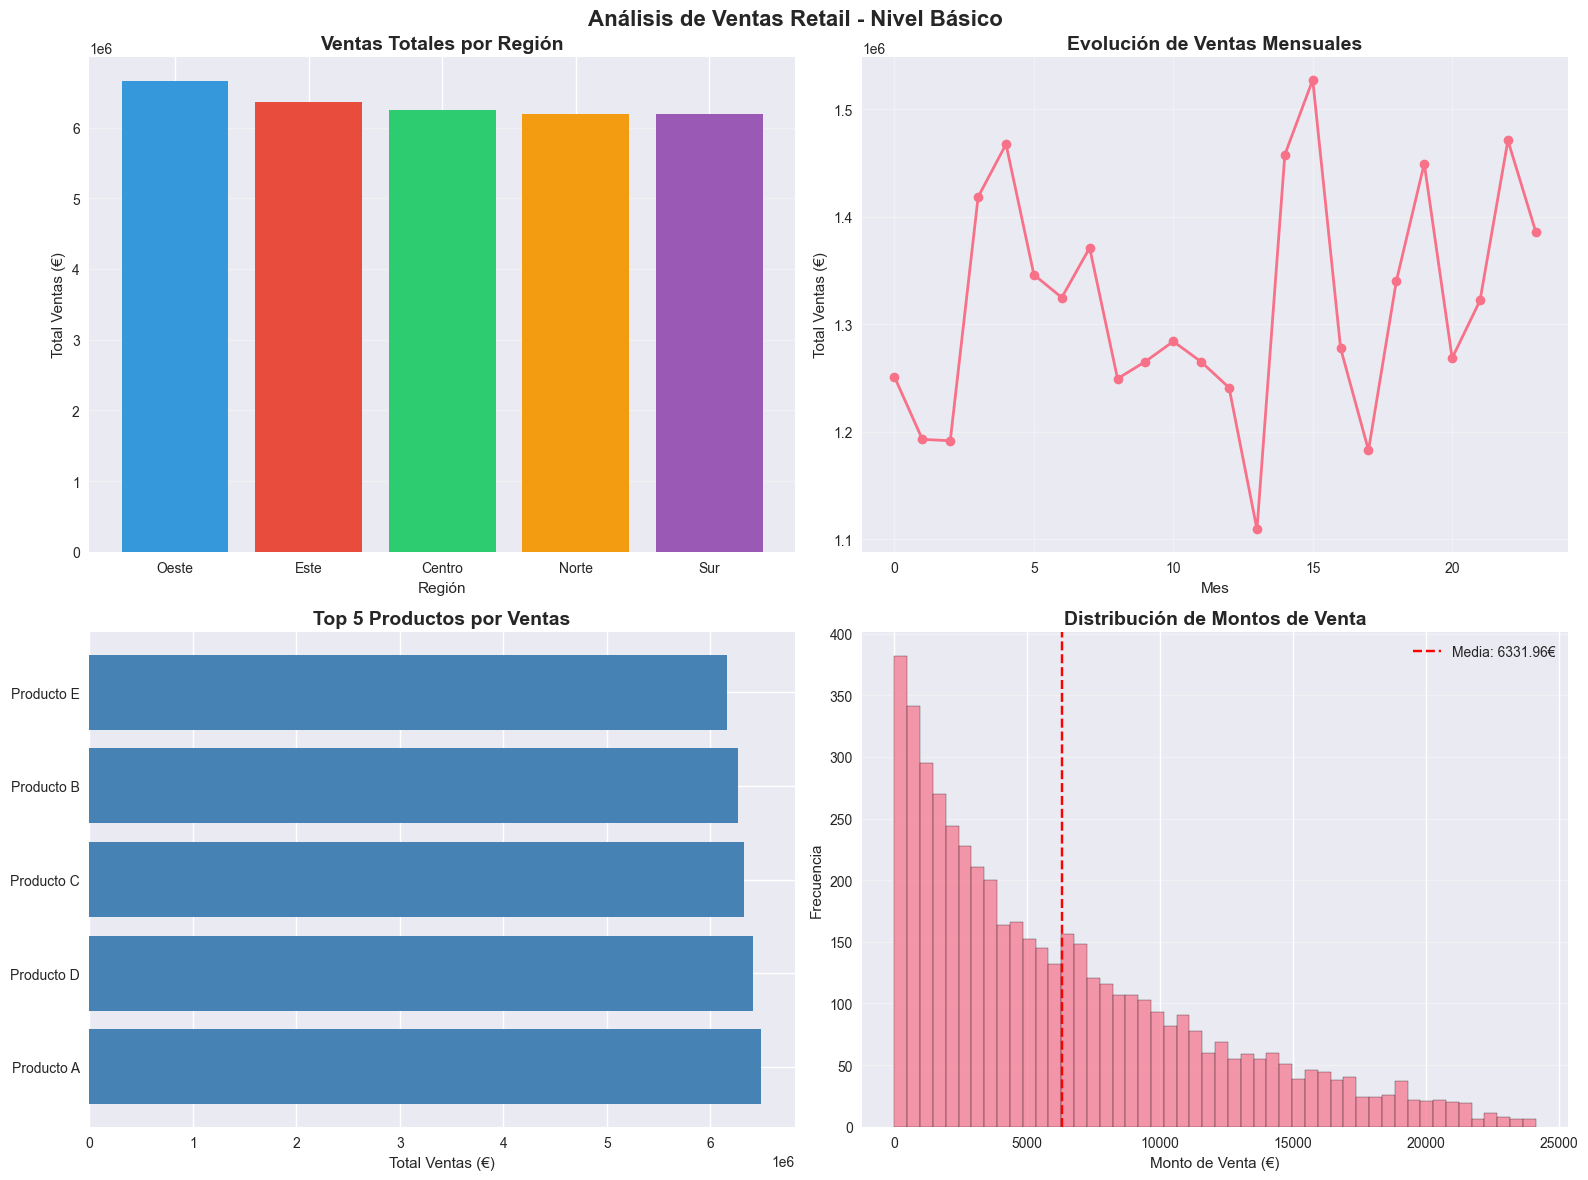

In [162]:
# Crear figura con múltiples gráficos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis de Ventas Retail - Nivel Básico', fontsize=16, fontweight='bold')

# Gráfico 1: Ventas por región
ventas_region = df_ventas.groupby('region')['total'].sum().sort_values(ascending=False)
axes[0, 0].bar(ventas_region.index, ventas_region.values, color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6'])
axes[0, 0].set_title('Ventas Totales por Región', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Región')
axes[0, 0].set_ylabel('Total Ventas (€)')
axes[0, 0].grid(axis='y', alpha=0.3)

# Gráfico 2: Ventas mensuales
axes[0, 1].plot(range(len(ventas_mensuales)), ventas_mensuales.values, marker='o', linewidth=2)
axes[0, 1].set_title('Evolución de Ventas Mensuales', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Mes')
axes[0, 1].set_ylabel('Total Ventas (€)')
axes[0, 1].grid(True, alpha=0.3)

# Gráfico 3: Top productos
top_productos = df_ventas.groupby('producto')['total'].sum().nlargest(5)
axes[1, 0].barh(top_productos.index, top_productos.values, color='steelblue')
axes[1, 0].set_title('Top 5 Productos por Ventas', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Total Ventas (€)')

# Gráfico 4: Distribución
axes[1, 1].hist(df_ventas['total'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(df_ventas['total'].mean(), color='r', linestyle='--', label=f'Media: {df_ventas["total"].mean():.2f}€')
axes[1, 1].set_title('Distribución de Montos de Venta', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Monto de Venta (€)')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/analisis_ventas_basico.png', dpi=300, bbox_inches='tight')
plt.show()


In [165]:
# Combinar ventas con clientes
df_ventas_clientes = df_ventas.merge(df_clientes, on='cliente_id', how='left')

# Ventas por segmento
ventas_por_segmento = df_ventas_clientes.groupby('segmento').agg({
    'total': ['sum', 'mean', 'count']
}).round(2)
ventas_por_segmento.columns = ['Total_Ventas', 'Ticket_Promedio', 'Num_Ventas']
ventas_por_segmento


,Total_Ventas,Ticket_Promedio,Num_Ventas
segmento,,,
Consumer,9781164.33,6434.98,1520
Corporate,10711878.60,6235.09,1718
Home Office,11166778.60,6337.56,1762


## 9. Resumen y Conclusiones


In [169]:
print("=" * 70)
print("RESUMEN DEL ANÁLISIS")
print("=" * 70)
print(f"\nTotal de ventas analizadas: {len(df_ventas):,}")
print(f"Ingresos totales: {df_ventas['total'].sum():,.2f}€")
print(f"Ticket promedio: {df_ventas['total'].mean():.2f}€")
print(f"\nRegión con más ventas: {df_ventas.groupby('region')['total'].sum().idxmax()}")
print(f"Producto más vendido: {df_ventas.groupby('producto')['cantidad'].sum().idxmax()}")
print(f"\nPeríodo analizado: {df_ventas['fecha'].min()} a {df_ventas['fecha'].max()}")


RESUMEN DEL ANÁLISIS

Total de ventas analizadas: 5,000
Ingresos totales: 31,659,821.53€
Ticket promedio: 6331.96€

Región con más ventas: Oeste
Producto más vendido: Producto D

Período analizado: 2023-01-01 00:00:00 a 2024-12-31 00:00:00


---

## ✅ Análisis Completado

Este notebook demuestra:
- ✅ Carga de datos desde PostgreSQL
- ✅ Exploración con pandas
- ✅ Estadísticas con numpy
- ✅ Visualizaciones básicas
- ✅ Análisis con JOINs
- ✅ Conclusiones del análisis
